# Exercise H6.1:  Convolutional neural network 

In [177]:
import tensorflow as tf
from tensorflow import keras

(X_train, y_labels_train), (X_test, y_labels_test) = keras.datasets.mnist.load_data(
    path="mnist.npz"
)

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

Adding 1 to each image for bias:

In [162]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [163]:
n_classes = 10
y_train = keras.utils.to_categorical(y_labels_train, n_classes)
y_test = keras.utils.to_categorical(y_labels_test, n_classes)

print("label:", y_labels_train[0])
print("one-hot:", y_train[0])

label: 5
one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Building linear model

Initializing weights:

In [164]:
import numpy as np

W = np.random.rand(10, (28 * 28) + 1)
W.shape

(10, 785)

In [165]:
# bias = np.random.rand(10)
# bias.shape

In [166]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)  # only difference


def predict_linear(x, W=W):
    h = W @ x  # - bias
    return softmax(h)

In [167]:
y_pred = predict_linear(X_train[0])
y_pred

array([1.27410608e-046, 2.29494485e-171, 1.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.77439993e-287, 0.00000000e+000, 0.00000000e+000,
       1.39571588e-261, 0.00000000e+000])

In [168]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [169]:
# log_loss is the same as cross-entropy
from sklearn.metrics import log_loss

log_loss([y_train[0]], [y_pred])

34.53877639491069

Cross-entropy for correct prediction:

In [170]:
log_loss([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

9.214851104388842e-15

Cross-entropy for wrong prediction:

In [171]:
log_loss([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

34.53877639491069

Using this as tutorial: http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/

In [172]:
def log_loss_grad(Xb, yb, W):
    batch_size = Xb.shape[0]
    gradients = []
    for k in range(n_classes):
        gradient_k = np.zeros(Xb.shape[1])
        for i in range(batch_size):
            y_pred = predict_linear(Xb[i], W)
            gradient_k += Xb[i] * (yb[i][k] - y_pred[k])
        gradients.append(-gradient_k)
    return np.array(gradients)

In [173]:
log_loss_grad(X_train[:10], y_train[:10], W).shape

(10, 785)

In [174]:
def compute_accuracy(X, y, W):
    correct = 0
    for i in range(X.shape[0]):
        x = X[i]
        y_pred_i = predict_linear(x, W)
        y_label_pred_i = np.argmax(y_pred_i)
        y_label_i = np.argmax(y[i])
        if y_label_i == y_label_pred_i:
            correct += 1
    return correct / X.shape[0]

In [175]:
compute_accuracy(X_train, y_train, W)

0.05793333333333334

In [154]:
batch_start = 0
p = X_train.shape[0]
batch_size = 100
W = np.random.rand(10, (28 * 28) + 1)
learning_rate = 0.5
acc_history = []

for i in range(10000):
    print("Iteration", i)
    start = (batch_size * i) % p
    end = (batch_size * (i + 1)) % p
    if end == 0:
        end = p
    Xb = X_train[start:end]
    yb = y_train[start:end]
    gradients = log_loss_grad(Xb, yb, W)
    W = W - learning_rate * gradients
    if i % 10 == 0:
        acc_history.append(compute_accuracy(X_train, y_train, W))

print(W)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

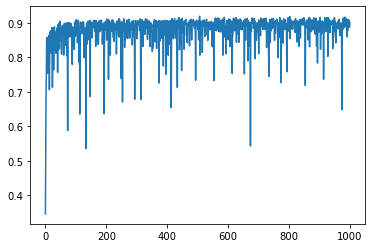

In [156]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(len(acc_history)), acc_history)

In [157]:
for i in range(100):
    x = X_train[i]
    y_pred_label_i = np.argmax(predict_linear(x, W))
    y_label_i = np.argmax(y_train[i])
    print(f"x_{i}")
    print("Predicted:", y_pred_label_i)
    print("True:", y_label_i)
    print("Correct:", y_label_i == y_pred_label_i)
    print()

x_0
Predicted: 5
True: 5
Correct: True

x_1
Predicted: 0
True: 0
Correct: True

x_2
Predicted: 4
True: 4
Correct: True

x_3
Predicted: 1
True: 1
Correct: True

x_4
Predicted: 9
True: 9
Correct: True

x_5
Predicted: 2
True: 2
Correct: True

x_6
Predicted: 1
True: 1
Correct: True

x_7
Predicted: 3
True: 3
Correct: True

x_8
Predicted: 1
True: 1
Correct: True

x_9
Predicted: 4
True: 4
Correct: True

x_10
Predicted: 3
True: 3
Correct: True

x_11
Predicted: 5
True: 5
Correct: True

x_12
Predicted: 3
True: 3
Correct: True

x_13
Predicted: 6
True: 6
Correct: True

x_14
Predicted: 1
True: 1
Correct: True

x_15
Predicted: 7
True: 7
Correct: True

x_16
Predicted: 2
True: 2
Correct: True

x_17
Predicted: 8
True: 8
Correct: True

x_18
Predicted: 6
True: 6
Correct: True

x_19
Predicted: 9
True: 9
Correct: True

x_20
Predicted: 4
True: 4
Correct: True

x_21
Predicted: 0
True: 0
Correct: True

x_22
Predicted: 9
True: 9
Correct: True

x_23
Predicted: 1
True: 1
Correct: True

x_24
Predicted: 1
True: 1


In [158]:
compute_accuracy(X_train, y_train, W)

0.88685

In [159]:
compute_accuracy(X_test, y_test, W)

0.8842

### Using Keras

In [180]:
(X_train, y_labels_train), (X_test, y_labels_test) = keras.datasets.mnist.load_data(
    path="mnist.npz"
)

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(
    Dense(
        n_classes,
        activation="softmax",
        input_dim=28 * 28,
    )
)

sgd = keras.optimizers.SGD(learning_rate=0.5)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

In [198]:
model.fit(
    X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=100
)

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 11021.9258 - accuracy: 0.8319 - val_loss: 6147.4790 - val_accuracy: 0.8714
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 7389.3032 - accuracy: 0.8657 - val_loss: 6228.4980 - val_accuracy: 0.8814
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 7082.1309 - accuracy: 0.8702 - val_loss: 5537.7134 - val_accuracy: 0.8913
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 6928.7310 - accuracy: 0.8717 - val_loss: 11581.6045 - val_accuracy: 0.8148
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 6612.5420 - accuracy: 0.8764 - val_loss: 5979.8350 - val_accuracy: 0.8795
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 6368.2764 - accuracy: 0.8769 - val_loss: 5905.3433 - val_accuracy: 0.8891
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 6209.7529 - accuracy: 0.8799 

## MLP

In [213]:
from tensorflow.keras.initializers import TruncatedNormal, Constant

trunc_norm = TruncatedNormal(mean=0, stddev=0.01)
constant = Constant(value=-1)

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [216]:
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

model = Sequential()

model = Sequential(
    [
        Input(28 * 28),
        Dense(
            1500,
            activation="relu",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
        Dense(
            1500,
            activation="relu",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
        Dense(
            1500,
            activation="relu",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
        Dense(
            n_classes,
            activation="softmax",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
    ]
)

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

In [217]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/10
600/600 [==============================] - 61s 101ms/step - loss: 0.2556 - accuracy: 0.9274 - val_loss: 0.1331 - val_accuracy: 0.9658
Epoch 2/10
600/600 [==============================] - 71s 118ms/step - loss: 0.1299 - accuracy: 0.9648 - val_loss: 0.1058 - val_accuracy: 0.9718
Epoch 3/10
600/600 [==============================] - 56s 93ms/step - loss: 0.0981 - accuracy: 0.9728 - val_loss: 0.1128 - val_accuracy: 0.9714
Epoch 4/10
600/600 [==============================] - 56s 94ms/step - loss: 0.0873 - accuracy: 0.9762 - val_loss: 0.1357 - val_accuracy: 0.9719
Epoch 5/10
600/600 [==============================] - 60s 101ms/step - loss: 0.0705 - accuracy: 0.9806 - val_loss: 0.1072 - val_accuracy: 0.9743
Epoch 6/10
600/600 [==============================] - 51s 84ms/step - loss: 0.0570 - accuracy: 0.9837 - val_loss: 0.1742 - val_accuracy: 0.9687
Epoch 7/10
600/600 [==============================] - 57s 95ms/step - loss: 0.0666 - accuracy: 0.9826 - val_loss: 0.1042 - val_accura

## MLP but with Dropout

In [218]:
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop = Sequential(
    [
        Input(28 * 28),
        Dropout(0.5),
        Dense(
            1500,
            activation="relu",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
        Dropout(0.5),
        Dense(
            1500,
            activation="relu",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
        Dropout(0.5),
        Dense(
            1500,
            activation="relu",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
        Dense(
            n_classes,
            activation="softmax",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
    ]
)

model_drop.compile(
    optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [219]:
model_drop.fit(
    X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=100
)

Epoch 1/10
600/600 [==============================] - 49s 82ms/step - loss: 1.4783 - accuracy: 0.5821 - val_loss: 0.6358 - val_accuracy: 0.8479
Epoch 2/10
600/600 [==============================] - 49s 81ms/step - loss: 0.8809 - accuracy: 0.7118 - val_loss: 0.5441 - val_accuracy: 0.8957
Epoch 3/10
600/600 [==============================] - 49s 81ms/step - loss: 0.7764 - accuracy: 0.7554 - val_loss: 0.4666 - val_accuracy: 0.9079
Epoch 4/10
600/600 [==============================] - 50s 83ms/step - loss: 0.7076 - accuracy: 0.7837 - val_loss: 0.4615 - val_accuracy: 0.9004
Epoch 5/10
600/600 [==============================] - 49s 82ms/step - loss: 0.6477 - accuracy: 0.8053 - val_loss: 0.3750 - val_accuracy: 0.9176
Epoch 6/10
600/600 [==============================] - 55s 92ms/step - loss: 0.6147 - accuracy: 0.8188 - val_loss: 0.4029 - val_accuracy: 0.9173
Epoch 7/10
600/600 [==============================] - 62s 103ms/step - loss: 0.6000 - accuracy: 0.8243 - val_loss: 0.3439 - val_accuracy

## CNN

In [258]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

X_2d_train = X_train.reshape(-1, 28, 28, 1)
X_2d_test = X_test.reshape(-1, 28, 28, 1)

model_cnn = Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(
            32,
            (5, 5),
            strides=(1, 1),
            padding="same",
            activation="relu",
            use_bias=True,
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(
            64,
            (5, 5),
            strides=(1, 1),
            padding="same",
            activation="relu",
            use_bias=True,
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(
            10,
            activation="softmax",
            kernel_initializer=trunc_norm,
            bias_initializer=constant,
        ),
    ]
)

model_cnn.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

In [259]:
X_2d_train.shape

(60000, 28, 28, 1)

In [260]:
model_cnn.fit(
    X_2d_train,
    y_train,
    epochs=10,
    validation_data=(X_2d_test, y_test),
    batch_size=100,
)

Epoch 1/10
600/600 [==============================] - 93s 155ms/step - loss: 0.1431 - accuracy: 0.9552 - val_loss: 0.0541 - val_accuracy: 0.9823
Epoch 2/10
600/600 [==============================] - 88s 146ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0491 - val_accuracy: 0.9847
Epoch 3/10
600/600 [==============================] - 87s 145ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9875
Epoch 4/10
600/600 [==============================] - 87s 145ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0453 - val_accuracy: 0.9874
Epoch 5/10
600/600 [==============================] - 87s 146ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0530 - val_accuracy: 0.9844
Epoch 6/10
600/600 [==============================] - 87s 145ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0607 - val_accuracy: 0.9850
Epoch 7/10
600/600 [==============================] - 87s 145ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0564 - val_ac